In [ ]:
from forecasting_models.multivariate_models.lstm.model import MultivarLSTMForecastModel
from data_utils.csv_utils import read_timeseries_csv

<Axes: xlabel='timestamp'>

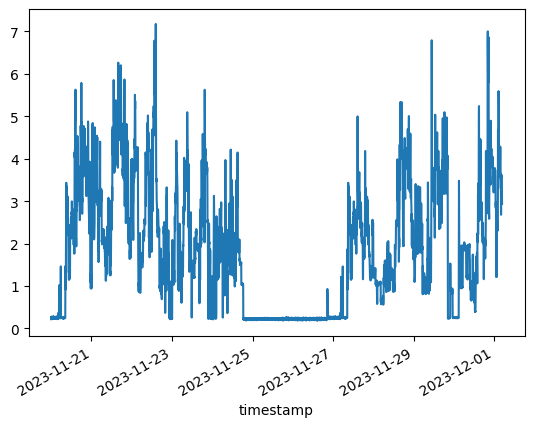

In [2]:
train_df = read_timeseries_csv("./examples/sample_data/multivar_data/multivar_example_5m_TRAIN.csv")
train_df["cpu_usage_percentage"].plot()

<Axes: xlabel='timestamp'>

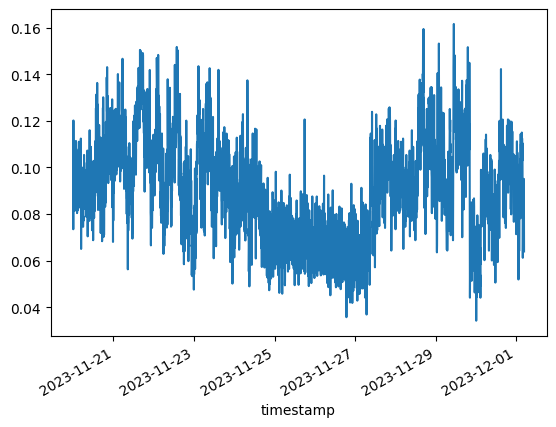

In [3]:
train_df["mem_usage_percentage"].plot()

array([[<Axes: title={'center': 'cpu_usage_percentage'}>,
        <Axes: title={'center': 'mem_usage_percentage'}>]], dtype=object)

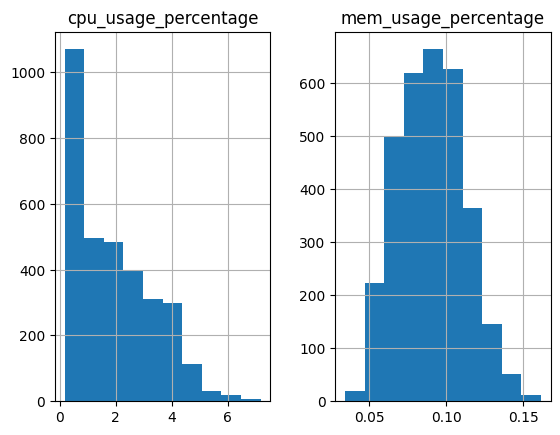

In [4]:
train_df.hist()

<Axes: xlabel='timestamp'>

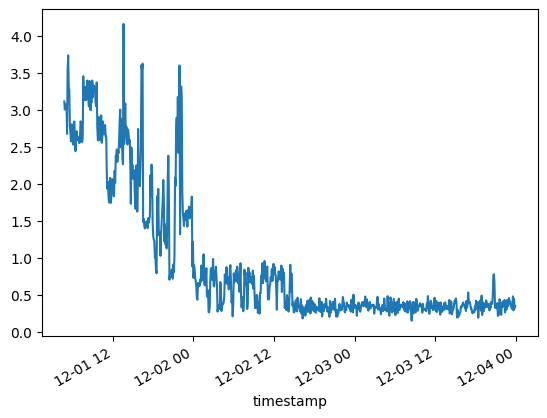

In [6]:
test_df = read_timeseries_csv("./examples/sample_data/multivar_data/multivar_example_5m_TEST.csv")
test_df["cpu_usage_percentage"].plot()

<Axes: xlabel='timestamp'>

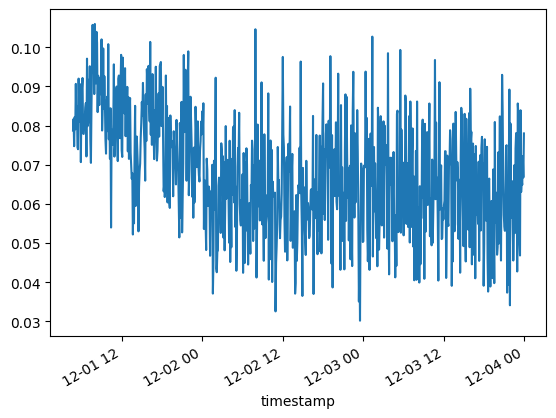

In [7]:
test_df["mem_usage_percentage"].plot()

array([[<Axes: title={'center': 'cpu_usage_percentage'}>,
        <Axes: title={'center': 'mem_usage_percentage'}>]], dtype=object)

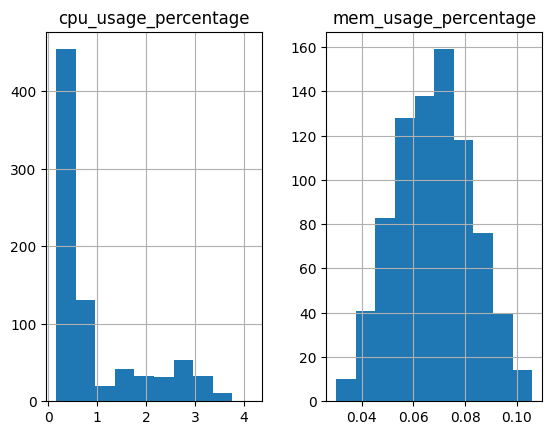

In [8]:
test_df.hist()

In [12]:
lstm = MultivarLSTMForecastModel("./examples/configs/multivar_lstm/multivar_lstm_config.yaml")

In [ ]:
lstm.train()

In [17]:
test_init_inputs_df = read_timeseries_csv(lstm.config.data_path)[lstm.config.variable_selection.input_variables][-lstm.config.forecasting_parameters.input_width:]

print(test_init_inputs_df.head(lstm.config.forecasting_parameters.input_width))

                     cpu_usage_percentage  mem_usage_percentage
timestamp                                                      
2023-12-01 03:45:22              4.088529              0.103091
2023-12-01 03:50:22              3.545235              0.083918
2023-12-01 03:55:22              3.442127              0.061200
2023-12-01 04:00:22              2.907451              0.067637
2023-12-01 04:05:22              2.680076              0.080101
2023-12-01 04:10:22              3.554933              0.088102
2023-12-01 04:15:22              3.627717              0.092182
2023-12-01 04:20:22              3.565279              0.071427
2023-12-01 04:25:22              3.584690              0.075333
2023-12-01 04:30:22              3.026067              0.095102
2023-12-01 04:35:22              3.229151              0.087424
2023-12-01 04:40:22              2.937589              0.063915


In [18]:
lstm.predict(
    test_init_inputs_df
)

,cpu_usage_percentage,mem_usage_percentage
2023-12-01 04:45:22,3.464171,0.095796
2023-12-01 04:50:22,3.433786,0.110329
2023-12-01 04:55:22,3.372545,0.127782
2023-12-01 05:00:22,3.374448,0.142319
2023-12-01 05:05:22,3.347678,0.100365
2023-12-01 05:10:22,3.349139,0.108349
2023-12-01 05:15:22,3.312043,0.110484
2023-12-01 05:20:22,3.336152,0.090086
2023-12-01 05:25:22,3.197600,0.115726
2023-12-01 05:30:22,3.235956,0.114724


In [19]:
test_df.head(lstm.config.forecasting_parameters.output_width)

,cpu_usage_percentage,mem_usage_percentage
timestamp,,
2023-12-01 04:45:22,3.113010,0.078752
2023-12-01 04:50:22,3.004385,0.081700
2023-12-01 04:55:22,3.075376,0.074745
2023-12-01 05:00:22,3.015011,0.082209
2023-12-01 05:05:22,3.048212,0.079055
2023-12-01 05:10:22,2.673476,0.090659
2023-12-01 05:15:22,3.545206,0.079945
2023-12-01 05:20:22,3.735257,0.084915
2023-12-01 05:25:22,3.307455,0.074416


In [20]:
metric_name = "cpu_usage_percentage"

eval_pred_val, eval_pred_df = lstm.evaluate_prediction(
    target_col_name=metric_name,
    test_series=test_df[metric_name][:lstm.config.forecasting_parameters.output_width],
    method="mae",
)

print(eval_pred_val)
eval_pred_df.head(lstm.config.forecasting_parameters.output_width)

0.33624474632060747


,actual,predicted,diff
2023-12-01 04:45:22,3.113010,3.464171,-0.351162
2023-12-01 04:50:22,3.004385,3.433786,-0.429401
2023-12-01 04:55:22,3.075376,3.372545,-0.297170
2023-12-01 05:00:22,3.015011,3.374448,-0.359437
2023-12-01 05:05:22,3.048212,3.347678,-0.299466
2023-12-01 05:10:22,2.673476,3.349139,-0.675663
2023-12-01 05:15:22,3.545206,3.312043,0.233163
2023-12-01 05:20:22,3.735257,3.336152,0.399105
2023-12-01 05:25:22,3.307455,3.197600,0.109855
2023-12-01 05:30:22,3.271119,3.235956,0.035162


In [22]:
test_result_df = lstm.test(
    read_timeseries_csv("./examples/sample_data/multivar_data/multivar_example_5m_TEST.csv"),
    init_inputs=test_init_inputs_df,
)

test_result_df.head(36)

,cpu_usage_percentage_actual,cpu_usage_percentage_predicted,mem_usage_percentage_actual,mem_usage_percentage_predicted
2023-12-01 04:45:22,3.113010,3.464171,0.078752,0.095796
2023-12-01 04:50:22,3.004385,3.433786,0.081700,0.110329
2023-12-01 04:55:22,3.075376,3.372545,0.074745,0.127782
2023-12-01 05:00:22,3.015011,3.374448,0.082209,0.142319
2023-12-01 05:05:22,3.048212,3.347678,0.079055,0.100365
2023-12-01 05:10:22,2.673476,3.349139,0.090659,0.108349
2023-12-01 05:15:22,3.545206,3.312043,0.079945,0.110484
2023-12-01 05:20:22,3.735257,3.336152,0.084915,0.090086
2023-12-01 05:25:22,3.307455,3.197600,0.074416,0.115726
2023-12-01 05:30:22,3.271119,3.235956,0.073975,0.114724


In [23]:
eval_val, eval_df = lstm.evaluate_test(
    test_result_df,
    "cpu_usage_percentage",
    method="mae",
)

print(eval_val)
eval_df.head(36)

0.3190790923359395


,actual,predicted,diff
2023-12-01 04:45:22,3.113010,3.464171,-0.351162
2023-12-01 04:50:22,3.004385,3.433786,-0.429401
2023-12-01 04:55:22,3.075376,3.372545,-0.297170
2023-12-01 05:00:22,3.015011,3.374448,-0.359437
2023-12-01 05:05:22,3.048212,3.347678,-0.299466
2023-12-01 05:10:22,2.673476,3.349139,-0.675663
2023-12-01 05:15:22,3.545206,3.312043,0.233163
2023-12-01 05:20:22,3.735257,3.336152,0.399105
2023-12-01 05:25:22,3.307455,3.197600,0.109855
2023-12-01 05:30:22,3.271119,3.235956,0.035162


In [24]:
anomaly_df = lstm.flag_anomalies(
    eval_df["actual"],
    eval_df["predicted"],
    5.0,
)

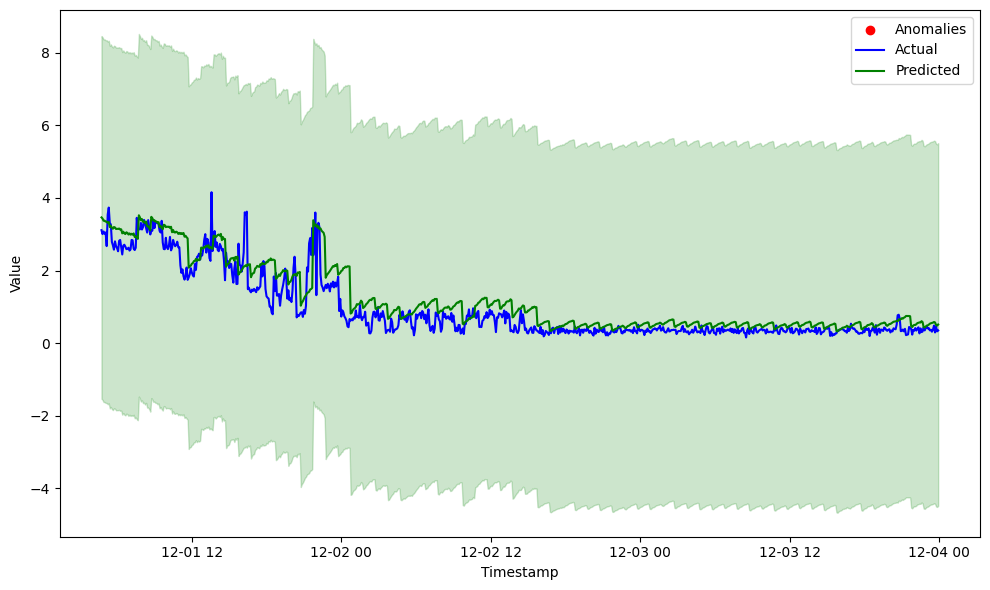

In [25]:
lstm.plotter.plot_anomalies(anomaly_df, 5.0)